# Untersuchung von verschiedenen Verteilungen

- <a href='#uniform'>Stetige Gleichverteilung</a>
- <a href='#uniform2'>2^Z, für Z = U(0,10) </a>
- <a href='#normal'>Normalverteilung</a>
- <a href='#normalq'>Quotient von Normalverteilten Zufallsvariablen</a>
- <a href='#exponential'>Exponentialverteilung</a>
- <a href='#lognormal'>Logarithmisch Normalverteilte Zufallsvariablen</a>
- <a href='#chi2'>Chi Quadrat Verteilung</a>
- <a href='#dreieck'>Dreiecksverteilung</a>
- <a href='#pareto'>Paretoverteilung</a>
- <a href='#zipf'>Zipfverteilung</a>

In [6]:
from numpy import random
import pandas as pd
import pandas as pd
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [12, 6]

In [7]:
class Benford():

    def significant(self, num):
        return 10**(log10(abs(num))-floor(log10(abs(num))))

    def nth_significant_digit(self, num, n=1):
        return floor(self.significant(num)*10**(n-1)) - 10*floor(self.significant(num)*10**(n-2))

    def sample_to_frequency_table(self, sample):
        df = pd.DataFrame(sample)
        df['digit'] = df[0].apply(self.nth_significant_digit)
        digit_count = df.groupby('digit')['digit'].count()
        digit_count = digit_count/sum(digit_count)*100
        b = pd.DataFrame(zip([log10(1+1/d)*100 for d in range(1,10)], range(1,10)), columns=['benford', 'digit']).set_index('digit')
        d = pd.DataFrame(digit_count).rename(columns={'digit':'sample_data'})
        table = b.merge(d, left_index=True, right_index=True, how='outer').fillna(0)
        return table

    def chi_squared_test(self, sample):
        df = pd.DataFrame(sample)
        df['digit'] = df[0].apply(self.nth_significant_digit)
        obs = df.groupby('digit')['digit'].count()
        obs = pd.DataFrame(range(1,10)).set_index(0).merge(obs, right_index=True, left_index=True, how='outer').fillna(0)
        exp = [log10(1+1/d)*len(sample) for d in range(1,10)]
        return sum(abs(obs.digit-exp)**2/exp)
    
    def kolmogorov_smirnov_test(self, table):
        t = table.cumsum()/100
        return max(abs(t.sample_data - t.benford))

    def table_to_distribution_plot(self, table):
        t = table.cumsum()
        fig, ax = plt.subplots()
        ax.step(x=t.index, y=t.sample_data, where='post', label='sample-data')
        ax.step(x=t.index, y=t.benford, where='post', label='benford')
        ax.set_ylabel('Kumulierte Häufigkeit', fontdict={'fontsize':14})
        ax.set_title('Vergleich der kumulierten Häufigkeiten', fontdict={'fontsize':22})
        ax.set_xlabel('Ziffer', fontdict={'fontsize':14})
        ax.set_xticks(t.index)
        ax.set_xticklabels(t.index)
        ax.legend()
        ax.set_ylim([0, 105])
        fig.tight_layout()
        return fig

    def table_to_barblot(self, table):
        width = 0.35
        fig, ax = plt.subplots()
        rects1 = ax.bar(table.index - width/2, round(table['sample_data'],2), width, label='sample-data')
        rects2 = ax.bar(table.index + width/2, round(table['benford'],2), width, label='benford')
        ax.set_ylabel('Relative Häufigkeit in %', fontdict={'fontsize':14})
        ax.set_title('Vergleich der Häufigkeiten in der Stichprobe zu Benfords Häufigkeiten', fontdict={'fontsize':22})
        ax.set_xlabel('Ziffer', fontdict={'fontsize':14})
        ax.set_xticks(table.index)
        ax.set_xticklabels(table.index)
        ax.legend()
        ax.bar_label(rects1, padding=3)
        ax.bar_label(rects2, padding=3)
        fig.tight_layout()
        return fig
    
    def table_to_mad(self, table):
        t = table/100
        return sum(abs(t.sample_data - t.benford))/9

In [8]:
benford = Benford()

<a id='uniform'></a>
## Gleichverteile Zufallsvariable auf [0,10]

In [9]:
sample = random.default_rng().uniform(0,10,1000)

In [10]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         13.0
2      17.609126         11.8
3      12.493874         13.1
4       9.691001          9.9
5       7.918125         11.0
6       6.694679         10.7
7       5.799195          9.8
8       5.115252         11.3
9       4.575749          9.4

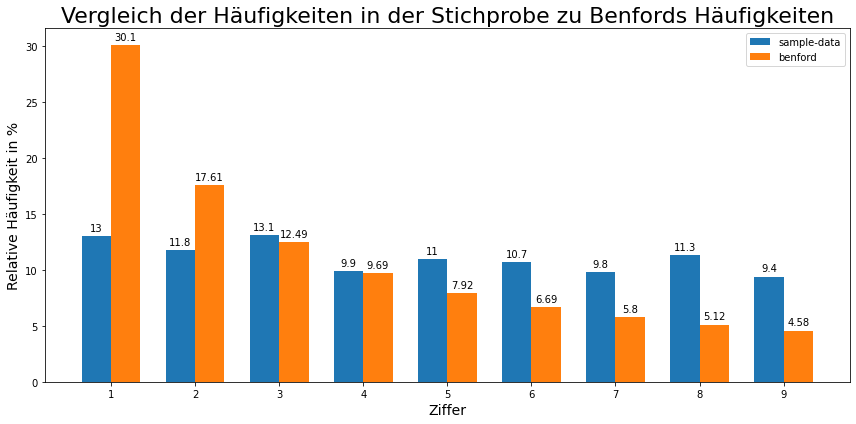

In [14]:
fig = benford.table_to_barblot(table)

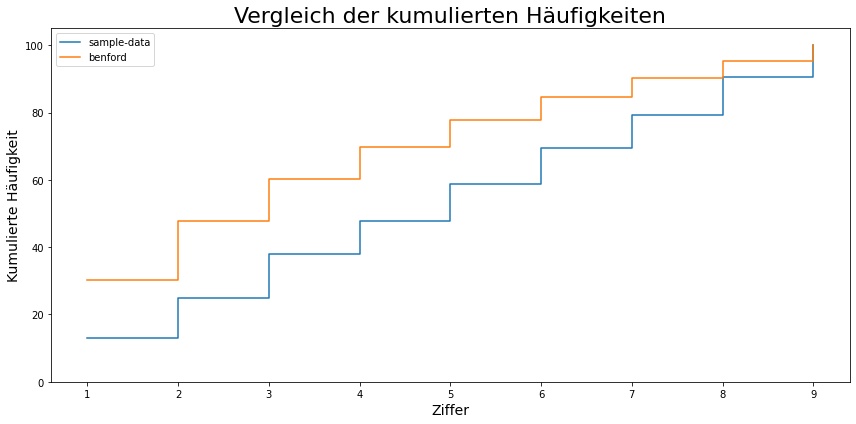

In [15]:
fig = benford.table_to_distribution_plot(table)

In [16]:
benford.chi_squared_test(sample)

305.8741829175213

Da $\chi^2 > 15.51 = \chi_{1-0.05, 8}^2 $ lehnen wir die Hypothese, dass die Daten Benfords Gesetz folgen, ab.

<a id='uniform2'></a>
## 2 ^ U(0,10)
Die Werte sind auf den Bereich \[1,1024\] beschränkt, dennoch folgen die Benfords Gesetz

In [108]:
sample = random.default_rng().uniform(0,10,1000)
sample = 2**sample

In [109]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         29.3
2      17.609126         18.3
3      12.493874         11.5
4       9.691001         10.0
5       7.918125          7.8
6       6.694679          6.5
7       5.799195          5.9
8       5.115252          5.0
9       4.575749          5.7

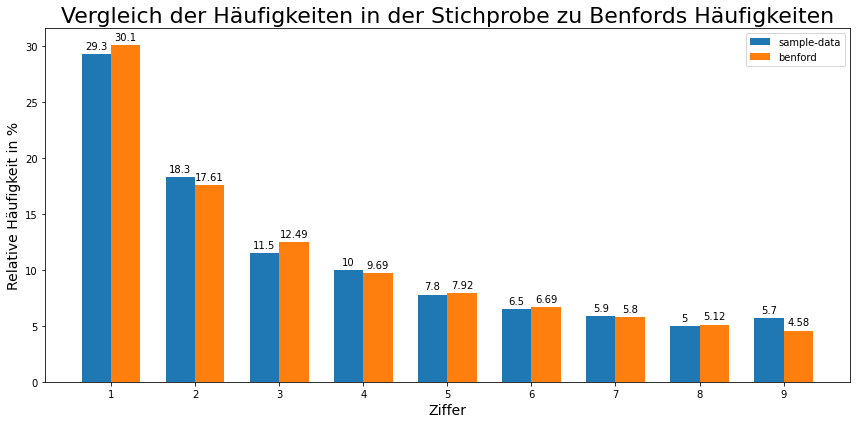

In [110]:
fig = benford.table_to_barblot(table)

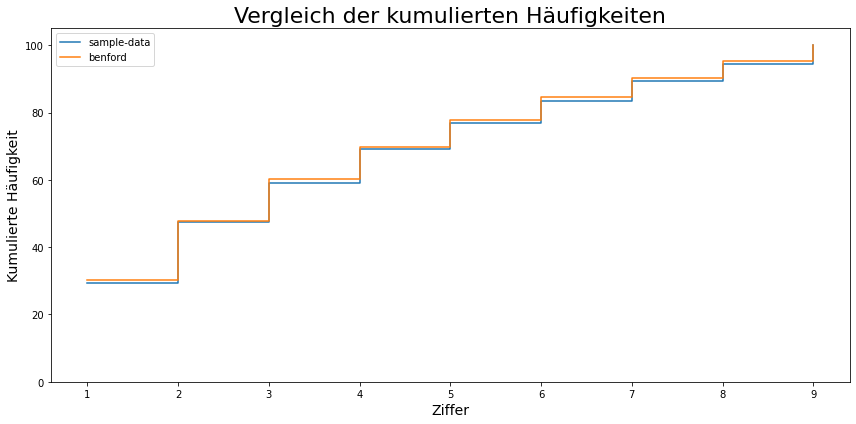

In [111]:
fig = benford.table_to_distribution_plot(table)

In [112]:
benford.chi_squared_test(sample)

4.2543801108008505

Da $ß\chi^2 < 15.51 = \chi_{1-0.05, 8}^2 $ lehnen wir die Hypothese, dass die Daten Benfords Gesetz folgen, nicht ab.

<a id='normal'></a>
## (Standard) Normalverteilung

In [22]:
sample = random.default_rng().normal(0,1,1000)

In [23]:
table = benford.sample_to_frequency_table(sample)

In [24]:
table

benford  sample_data
digit                        
1      30.103000         35.7
2      17.609126         13.0
3      12.493874          8.1
4       9.691001          7.8
5       7.918125          9.4
6       6.694679          7.3
7       5.799195          7.1
8       5.115252          7.3
9       4.575749          4.3

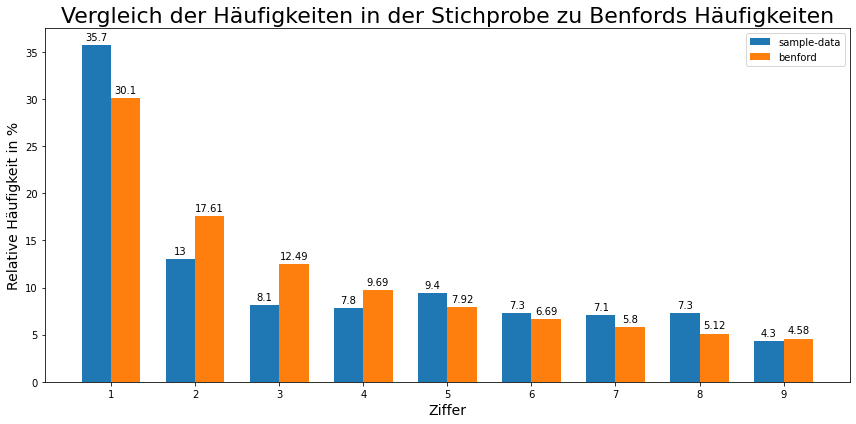

In [25]:
fig = benford.table_to_barblot(table)

In [26]:
benford.chi_squared_test(sample)

57.34879938951194

Die Standardnormalverteilung folgt also nicht Benfords Gesetz. Noch deutlicher ist der Unterschied, wenn der Mittelwert != 0 ist.

In [27]:
sample = random.default_rng().normal(4,1,1000)

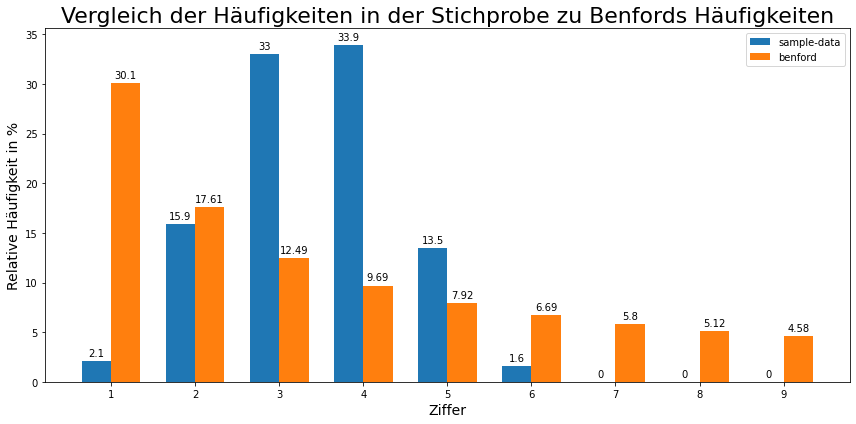

In [28]:
fig = benford.table_to_barblot(benford.sample_to_frequency_table(sample))

In [29]:
benford.sample_to_frequency_table(sample)

benford  sample_data
digit                        
1      30.103000          2.1
2      17.609126         15.9
3      12.493874         33.0
4       9.691001         33.9
5       7.918125         13.5
6       6.694679          1.6
7       5.799195          0.0
8       5.115252          0.0
9       4.575749          0.0

In [30]:
benford.chi_squared_test(sample)

1436.5045289850573

<a id='normalq'></a>
# Quotent von Standard Normalverteilten Zufallsvariablen

In [37]:
sample1 = random.default_rng().normal(0,1,1000)
sample2 = random.default_rng().normal(0,1,1000)

In [38]:
sample = [a/b for (a,b) in zip(sample1, sample2)]

In [39]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         31.3
2      17.609126         17.0
3      12.493874         12.3
4       9.691001          9.5
5       7.918125          6.9
6       6.694679          7.6
7       5.799195          5.6
8       5.115252          5.2
9       4.575749          4.6

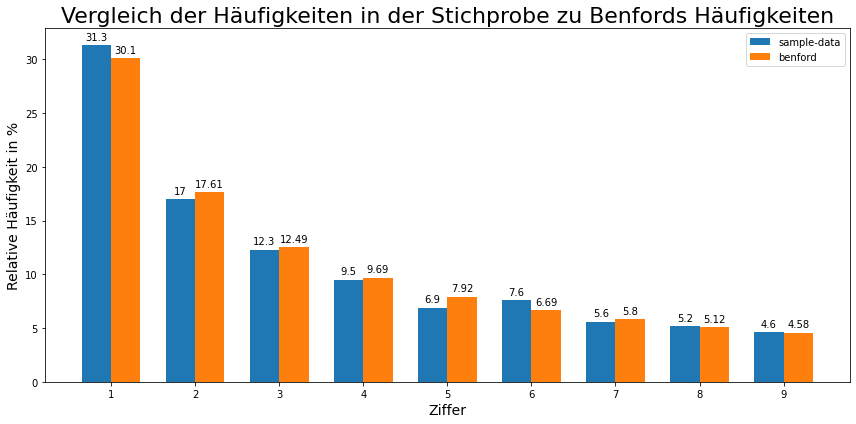

In [40]:
fig = benford.table_to_barblot(table)

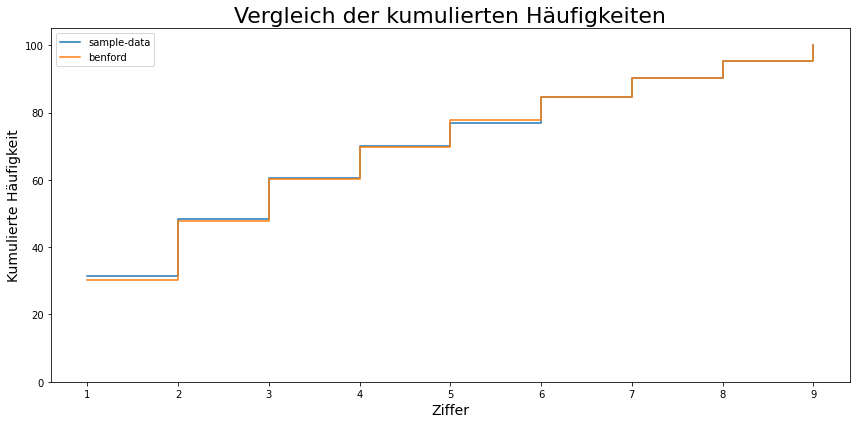

In [41]:
fig = benford.table_to_distribution_plot(table)

In [42]:
benford.chi_squared_test(sample)

3.3715360496728604

In [43]:
benford.table_to_mad(table)

0.004914044821633138

<a id='exponential'></a>
## Exponentialverteilung

In [44]:
sample = random.default_rng().exponential(3,1000)

In [45]:
benford.sample_to_frequency_table(sample)

benford  sample_data
digit                        
1      30.103000         28.6
2      17.609126         17.3
3      12.493874         13.2
4       9.691001         10.5
5       7.918125          8.0
6       6.694679          7.3
7       5.799195          6.3
8       5.115252          4.9
9       4.575749          3.9

$\chi^2$ und MAD in Abhängigkeit vom Parameter $\lambda $

In [46]:
l_list = [1/8, 1/4, 1/2, 1, 2, 3, 4, 5, 6, 7]
x_list = []
mad_list = []
for l in l_list:
    s = random.default_rng().exponential(l,1000)
    x_2 = benford.chi_squared_test(s)
    mad = benford.table_to_mad(benford.sample_to_frequency_table(s))
    x_list.append(x_2)
    mad_list.append(mad)

In [47]:
pd.DataFrame(zip(l_list, x_list, mad_list), columns=['lambda', 'X²', 'MAD'])

lambda         X²       MAD
0   0.125   9.787879  0.008229
1   0.250  16.200221  0.011569
2   0.500   6.220669  0.007118
3   1.000  19.780368  0.013564
4   2.000  18.479905  0.012195
5   3.000  14.239707  0.010483
6   4.000  13.823746  0.011340
7   5.000  12.984770  0.010310
8   6.000   7.539323  0.006668
9   7.000  10.728108  0.009823

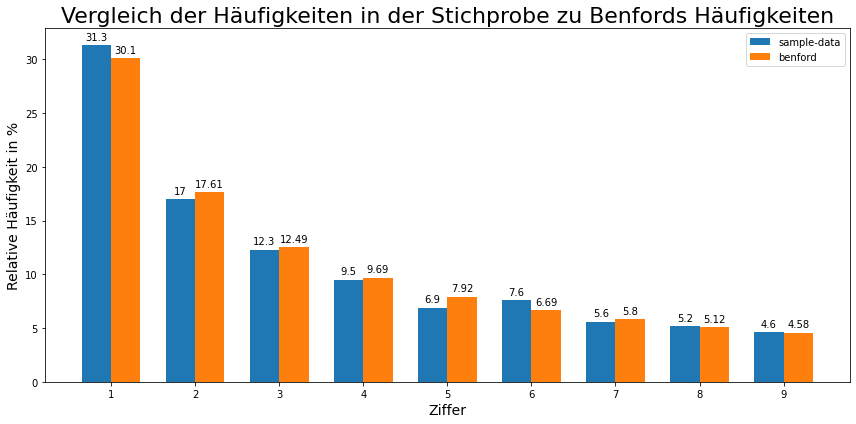

In [50]:
fig = benford.table_to_barblot(table)

In [51]:
benford.chi_squared_test(sample)

3.9559266873625365

<a id='lognormal'></a>
## Lognormal Verteilung

In [52]:
sample = random.default_rng().lognormal(0,1,1000)

In [53]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         30.8
2      17.609126         17.3
3      12.493874         11.6
4       9.691001          9.4
5       7.918125          9.4
6       6.694679          6.2
7       5.799195          5.9
8       5.115252          5.0
9       4.575749          4.4

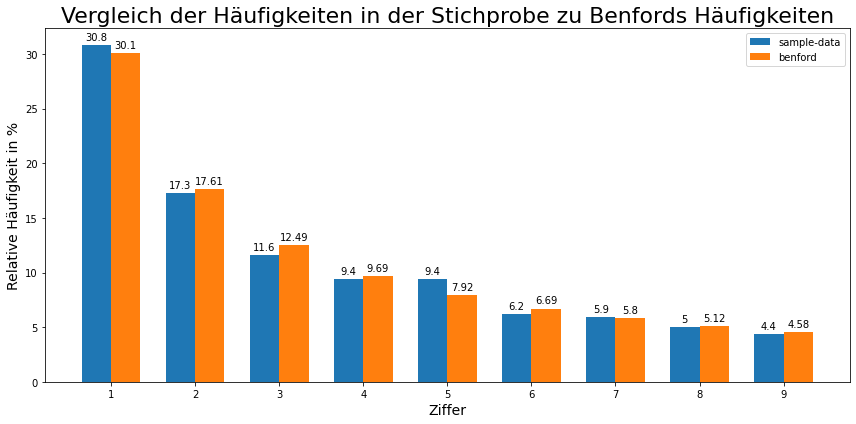

In [54]:
fig = benford.table_to_barblot(table)

In [55]:
benford.chi_squared_test(sample)

4.192397608860065

<a id='chi2'></a>
## Chi Quadrat Verteilung

In [72]:
sample = random.default_rng().chisquare(1, 1000)

In [73]:
benford.sample_to_frequency_table(sample)

benford  sample_data
digit                        
1      30.103000         30.5
2      17.609126         16.7
3      12.493874         13.5
4       9.691001         10.8
5       7.918125          7.0
6       6.694679          5.9
7       5.799195          5.6
8       5.115252          5.7
9       4.575749          4.3

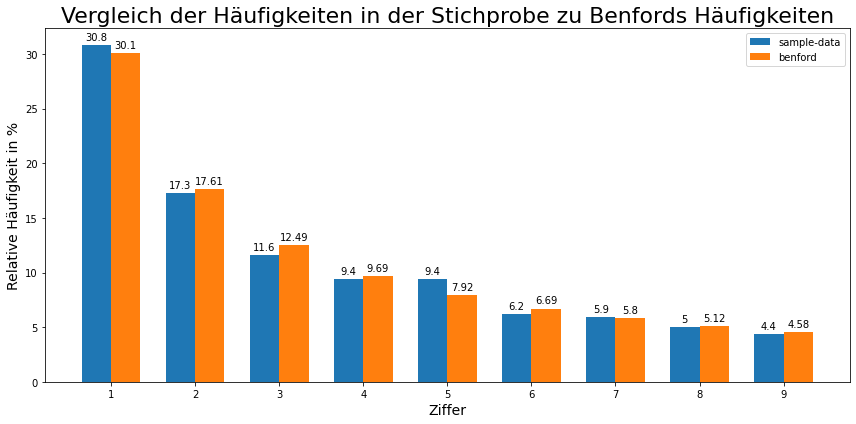

In [74]:
fig = benford.table_to_barblot(table)

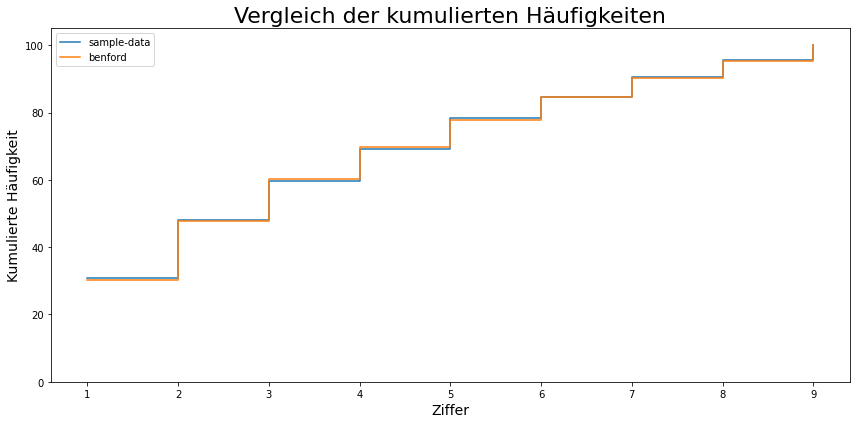

In [75]:
fig = benford.table_to_distribution_plot(table)

In [76]:
benford.chi_squared_test(sample)

5.511985759058804

$\chi^2$ und MAD in Abhängigkeit vom Freiheitsgrad

In [79]:
df_list = range(1,21)
x_list = []
mad_list = []
for df in df_list:
    s = random.default_rng().chisquare(df,1000)
    x_2 = benford.chi_squared_test(s)
    mad = benford.table_to_mad(benford.sample_to_frequency_table(s))
    x_list.append(x_2)
    mad_list.append(mad)

In [82]:
pd.DataFrame(zip(df_list, x_list, mad_list), columns=['df', 'X²', 'MAD'])

df          X²       MAD
0    1    8.132241  0.007315
1    2   15.401520  0.011360
2    3   27.668053  0.016429
3    4   47.103106  0.022281
4    5  132.166786  0.037340
5    6  160.789558  0.040471
6    7  208.425331  0.044458
7    8  259.823910  0.045104
8    9  321.440587  0.053098
9   10  316.792331  0.058471
10  11  448.548443  0.072027
11  12  457.806526  0.071571
12  13  576.383263  0.078904
13  14  597.503342  0.076936
14  15  666.525235  0.078269
15  16  763.815930  0.084471
16  17  763.651998  0.090417
17  18  742.863292  0.093084
18  19  730.352480  0.093306
19  20  717.427712  0.090417

Der Unterschied zu Benfords Verteilung nimmt mit zunehmendem Freiheitsgrad der Chi Quadrat Verteilung zu.

<a id='dreieck'></a>
## Dreiecksverteilung

In [96]:
sample = random.default_rng().triangular(-23, 0, 82, 1000)

In [97]:
table = benford.sample_to_frequency_table(sample)

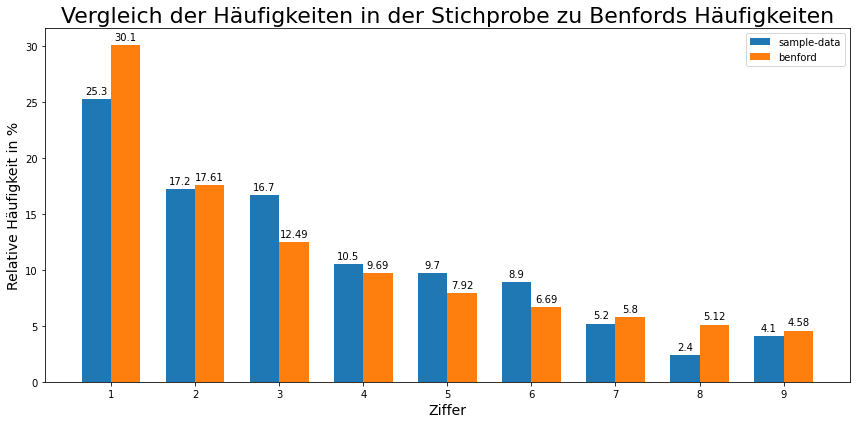

In [99]:
fig = benford.table_to_barblot(table)

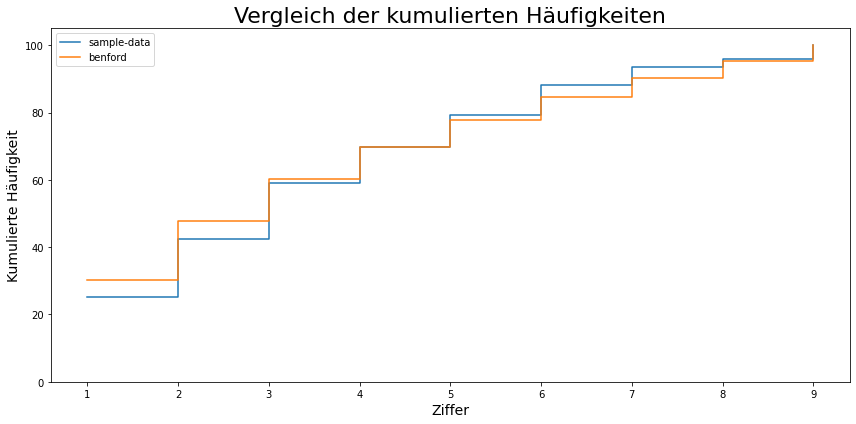

In [100]:
fig = benford.table_to_distribution_plot(table)

In [101]:
benford.chi_squared_test(sample)

49.39507749806789

<a id='pareto'></a>
## Paretoverteilung

In [114]:
sample = random.default_rng().pareto(2,1000)

In [117]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         31.4
2      17.609126         17.0
3      12.493874         10.7
4       9.691001          8.6
5       7.918125          8.3
6       6.694679          8.6
7       5.799195          5.8
8       5.115252          5.5
9       4.575749          4.1

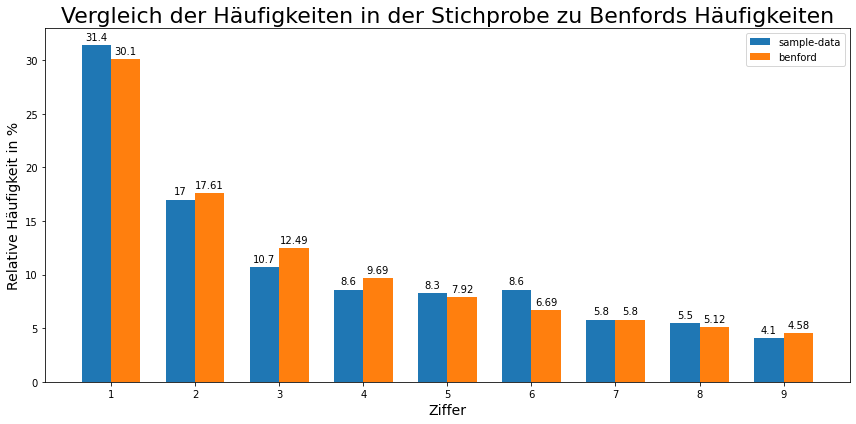

In [118]:
fig = benford.table_to_barblot(table)

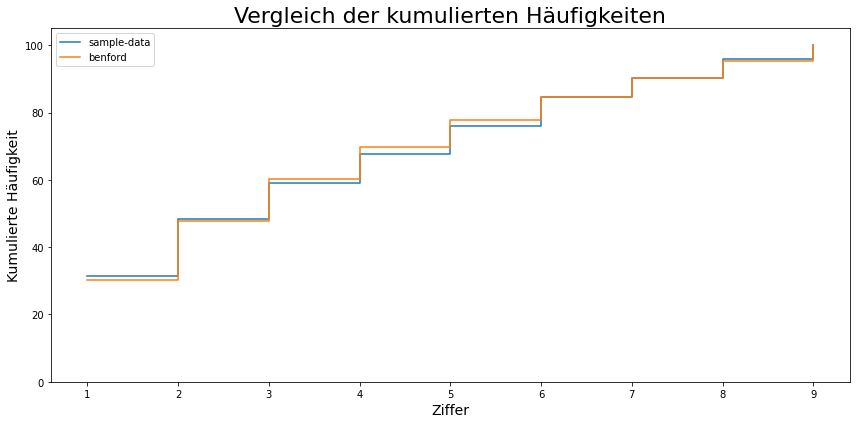

In [119]:
fig = benford.table_to_distribution_plot(table)

In [120]:
benford.chi_squared_test(sample)

10.964204190062208

<a id='zipf'></a>
## Zipfverteilung

In [144]:
sample = random.default_rng().zipf(3,1000)

In [145]:
table = benford.sample_to_frequency_table(sample)
table

benford  sample_data
digit                        
1      30.103000         83.6
2      17.609126         11.0
3      12.493874          2.5
4       9.691001          1.3
5       7.918125          0.7
6       6.694679          0.6
7       5.799195          0.2
8       5.115252          0.1
9       4.575749          0.0

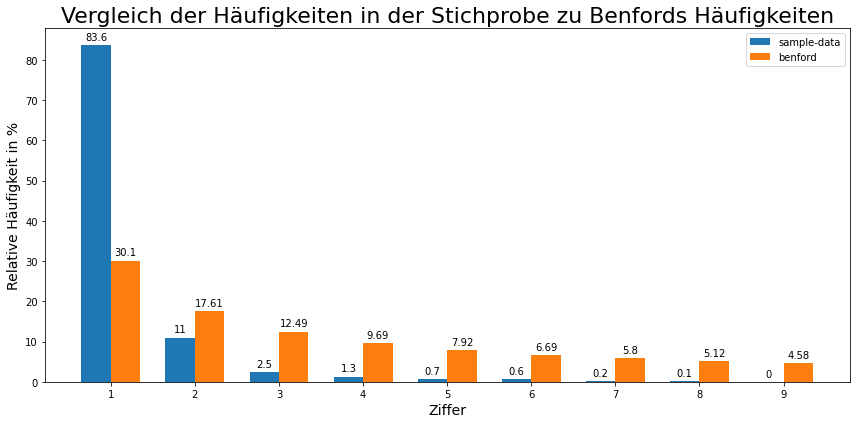

In [146]:
fig = benford.table_to_barblot(table)

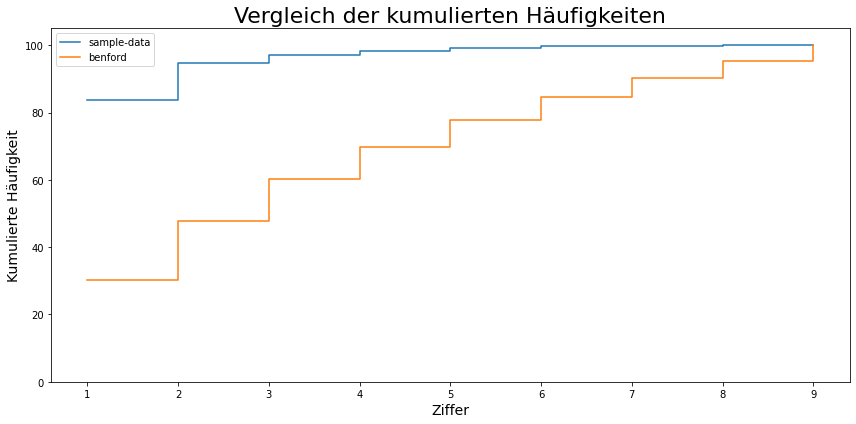

In [147]:
fig = benford.table_to_distribution_plot(table)

In [143]:
benford.chi_squared_test(sample)

1414.8101649907628